In [7]:
import json 
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#JSON dosyasını oku
path= "../data/processed/turkce_questions.json"
with open (path, "r", encoding="utf-8") as f:
    data =json.load(f) #json.load()-> dosyayı Python listesine çeviir.
#JSON verisini DataFrame'e dönüştür
df= pd.DataFrame(data) #listeyi tabloya çevirir.
#Temel bilgiler 
print("Toplam soru sayısı:", len(df))
print("DataFrame örneği: \n")
display(df.head(3)) #ilk 3 satır

Toplam soru sayısı: 52
DataFrame örneği: 



,id,soru,secenekler,cevap
0,1,"Aşağıdaki cümlelerin hangisinde ""ünsüz benzeşm...","{'A) Çocuk, annesinin arkasından sessizce baka...",None
1,2,"Aşağıdaki cümlelerin hangisinde ""ki""nin yazımı...","{'A) Mademki gelmeyecektin, neden bana haber v...",None
2,3,Aşağıdaki cümlelerin hangisinde bir yazım yanl...,{'A) Herhangi bir sorunla karşılaşırsanız bizi...,None


### -----------------------------------------------------------------------------------------------------------------

Ortalama soru uzunluğu: 282.15
En uzun soru: 1112 karakter
En kısa soru: 2 karakter


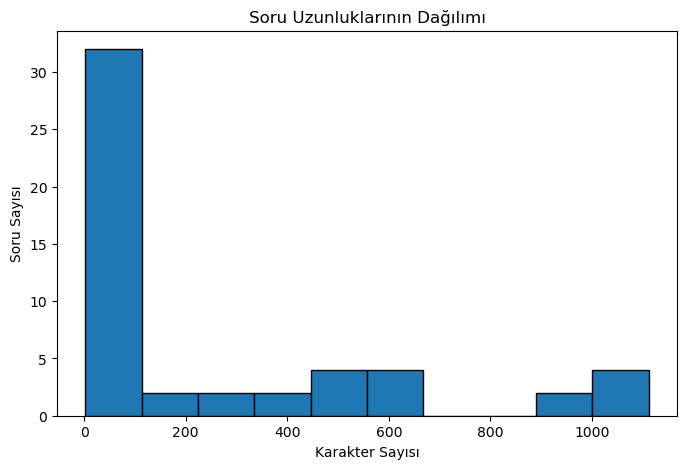

In [11]:
df["soru_uzunluğu"]= df["soru"].apply(len)

#soru metinlerinin uzunluklarını (karakter sayısı olarak) ölç
print("Ortalama soru uzunluğu:", round(df["soru_uzunluğu"].mean(),2))
print("En uzun soru:", df["soru_uzunluğu"].max(), "karakter")
print("En kısa soru:", df["soru_uzunluğu"].min(), "karakter")

plt.figure(figsize=(8,5))
plt.hist(df["soru_uzunluğu"], bins=10, edgecolor='black')
plt.title("Soru Uzunluklarının Dağılımı")
plt.xlabel("Karakter Sayısı")
plt.ylabel("Soru Sayısı")
plt.show()
#bunu aynı şekilde cevap dağılımı için de yapabilirsin

### --------------------------------------------------------------------------------------------------------------------

In [13]:
from collections import Counter
import re

En sık geçen kelimeler
bir: 88
bu: 56
ve: 38
cümlelerin: 24
aşağıdaki: 22
aşağıdakilerden: 20
hangisinde: 18
ilgili: 14
i: 14
olarak: 14


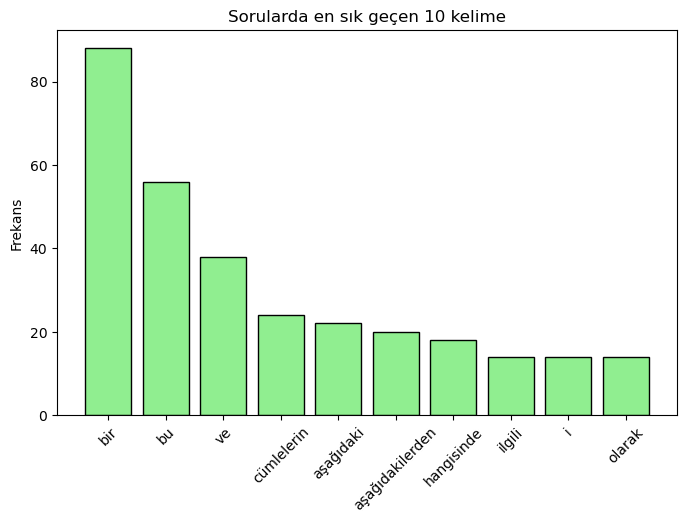

In [15]:
#tüm soruları birleştirip küçük harfe çevir
tum_sorular= " ".join(df["soru"].tolist()).lower()

#sadece kelimeleri al (noktalama işaretleirini çıkar)
kelimeler =re.findall(r"\b\w+\b", tum_sorular)

#en sık geçen 10 kelime
en_sik= Counter(kelimeler).most_common(10)
print("En sık geçen kelimeler")
for kelime, sayi in en_sik:
    print(f"{kelime}: {sayi}")

#görselleştir:
kelimeler_listesi, sayilar=zip(*en_sik)
plt.figure(figsize=(8,5))
plt.bar(kelimeler_listesi, sayilar, color= "lightgreen", edgecolor="black")
plt.title("Sorularda en sık geçen 10 kelime")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.show()